In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
fraud = pd.read_csv('fraud_dataset_example.csv')
from sklearn.preprocessing import StandardScaler

# EDA

In [125]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [126]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [127]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [128]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [129]:
type_dummies = pd.get_dummies(fraud['type'], drop_first = True)

In [130]:
fraud = pd.concat([fraud,  type_dummies], axis = 1)
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0,0,0,1,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0,1,0,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0,0,0,1,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0,0,0,0,1


In [131]:
fraud = fraud.drop('type', axis = 1)

In [132]:
fraud

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,10,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0,0,0,1,0
101609,10,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0,1,0,0,0
101610,10,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0,0,0,1,0
101611,10,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0,0,0,0,1


In [133]:
isFraud = fraud[fraud['isFraud'] == 1]
isFraud

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1,0,0,0
251,1,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,0,0,0,1
252,1,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,1,0,0,0
680,1,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,10,277970.88,C489647033,0.00,0.0,C571514738,0.00,277970.88,1,0,1,0,0,0
90070,10,93810.76,C481501970,93810.76,0.0,C1262577882,0.00,0.00,1,0,0,0,0,1
90071,10,93810.76,C1190429229,93810.76,0.0,C2104652067,4096048.05,4189858.81,1,0,1,0,0,0
99371,10,503405.88,C1446009472,503405.88,0.0,C2010733400,0.00,0.00,1,0,0,0,0,1


<AxesSubplot:xlabel='newbalanceOrig', ylabel='Count'>

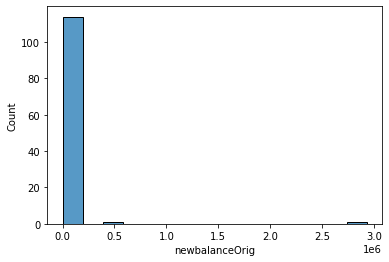

In [134]:
sns.histplot(isFraud, x = 'newbalanceOrig', bins = 15)

Seems most fraud transactions wipe the bank accounts clean.

In [135]:
fraud

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,10,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0,0,0,1,0
101609,10,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0,1,0,0,0
101610,10,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0,0,0,1,0
101611,10,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0,0,0,0,1


In [139]:
fraud = fraud.drop(['nameOrig', 'nameDest'], axis = 1)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = fraud[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER',
           'oldbalanceDest', 'newbalanceDest']]
y = fraud['isFraud']
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.33, random_state=42)

In [141]:
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[33500     0]
 [   32     1]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33500
           1       1.00      0.03      0.06        33

    accuracy                           1.00     33533
   macro avg       1.00      0.52      0.53     33533
weighted avg       1.00      1.00      1.00     33533



This model is amazing because although it has a few false positives, it gets the frauds correct. If deployed in a real bank, a few transactions that are not fraud may always get investigated and if they are not actually fraud, the bank can clear it up.